In [18]:
import numpy as np
import pandas as pd
from datetime import datetime

df= pd.read_csv('cleaned_qf.csv')
df['pdata_clean']=df['pdata_clean'].astype(str)

def convertDate(d):
    new_date = datetime.strptime(d, "%Y-%m-%dT%H:%M:%S%z")
    return new_date.date()
 
df['published'] = df['published'].apply(lambda date: convertDate(date))
df


,file_name,page_number,title,summary,page_data,published,pdata_clean
0,paper_qf_1.pdf,1,Quantum Game Theory in Finance,This is a short review of the background and...,arXiv:quant-ph/0406129v1 18 Jun 2004Quantum G...,2004-06-18,juquantum game tory nance edward ptrow instit...
1,paper_qf_1.pdf,2,Quantum Game Theory in Finance,This is a short review of the background and...,can be considered as an obstacle to uniﬁcation...,2004-06-18,quantum full nature fascinati it it trefore a...
2,paper_qf_1.pdf,3,Quantum Game Theory in Finance,This is a short review of the background and...,(the most interesting examples emerge from cry...,2004-06-18,som rec e quantum besis nature trefore quan...
3,paper_qf_1.pdf,4,Quantum Game Theory in Finance,This is a short review of the background and...,deﬁned by the prescription for its measurement...,2004-06-18,rmit iaany t but tre ref ihi ller quantum ...
4,paper_qf_1.pdf,5,Quantum Game Theory in Finance,This is a short review of the background and...,•error theory: second moments of a random vari...,2004-06-18,marwitz cac limortocho nobel prize rmit iaand...
...,...,...,...,...,...,...,...
1132,paper_qf_52.pdf,6,Detecting intraday financial market states usi...,We propose the application of a high-speed m...,\n5. A high-speed Parallel Genetic Algorithm i...,2015-08-20,llel genetic algorithm t equatgra mars li w ra...
1133,paper_qf_52.pdf,7,Detecting intraday financial market states usi...,We propose the application of a high-speed m...,\npopulations often lead to sub-optimal algori...,2015-08-20,for india before t india before ms graphics pr...
1134,paper_qf_52.pdf,8,Detecting intraday financial market states usi...,We propose the application of a high-speed m...,"\n(FV), the market state assignment can be det...",2015-08-20,vs vs euiato new feature veor te ute calculat...
1135,paper_qf_52.pdf,9,Detecting intraday financial market states usi...,We propose the application of a high-speed m...,\ndo not represent an exhaustive set of possib...,2015-08-20,level additnal scale t isemany ga articial int...


In [19]:
import pandas as pd
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from gensim.models import LdaModel
import re

#function to preprocess text
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  #non-alphabet characters removed
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]

    unigrams = words
    bigrams = [' '.join(phrase) for phrase in list(ngrams(words, 2))]
    
    return unigrams, bigrams  #return both unigrams and bigrams


#preprocessing of data
df['unigrams'], df['bigrams'] = zip(*df['pdata_clean'].apply(preprocess_text))

#dictionary for unigrams
dictionary_unigrams = corpora.Dictionary(df['unigrams'])
corpus_unigrams = [dictionary_unigrams.doc2bow(text) for text in df['unigrams']]

#train the LDA model for unigrams
lda_model_unigrams = LdaModel(corpus_unigrams, num_topics=10, id2word=dictionary_unigrams, passes=15)

#dictionary for bigrams
dictionary_bigrams = corpora.Dictionary(df['bigrams'])
corpus_bigrams = [dictionary_bigrams.doc2bow(text) for text in df['bigrams']]

#train the LDA model for bigrams
lda_model_bigrams = LdaModel(corpus_bigrams, num_topics=10, id2word=dictionary_bigrams, passes=15)

#function to get the most significant words for a topic
def get_topic_words(model, dictionary, topic):
    topic_words = [word for word, prob in model.show_topic(topic, topn=10) if word not in ['agents','agent','ai', 'intelligence','artificial intelligence','cial intelligence','artificial','arti cial','phys rev','phys',]]  # Adjust topn as needed
    return topic_words

#extract 3 unigram topics and 2 bigram topics
df['unigram_topics'] = df['unigrams'].apply(lambda x: get_topic_words(lda_model_unigrams, dictionary_unigrams, lda_model_unigrams[dictionary_unigrams.doc2bow(x)][0][0]))
df['bigram_topics'] = df['bigrams'].apply(lambda x: get_topic_words(lda_model_bigrams, dictionary_bigrams, lda_model_bigrams[dictionary_bigrams.doc2bow(x)][0][0]))

#combine the topics into a single column
df['topics'] = df.apply(lambda row: row['unigram_topics'][:3] + row['bigram_topics'][:2], axis=1)

df.to_csv('topics_qf_lda.csv', index=False)


In [20]:
df.drop(["page_number","title","summary", "page_data"], axis=1)


,file_name,published,pdata_clean,unigrams,bigrams,unigram_topics,bigram_topics,topics
0,paper_qf_1.pdf,2004-06-18,juquantum game tory nance edward ptrow instit...,"[juquantum, game, tory, nance, edward, ptrow, ...","[juquantum game, game tory, tory nance, nance ...","[b, tx, max, v, te, ts, loss, wins, ola, struuri]","[alth care, consumer disetnary, ola v, articia...","[b, tx, max, alth care, consumer disetnary]"
1,paper_qf_1.pdf,2004-06-18,quantum full nature fascinati it it trefore a...,"[quantum, full, nature, fascinati, trefore, ae...","[quantum full, full nature, nature fascinati, ...","[eq, ry, nance, journal, st, ki, ty, note, tre...","[ft ft, eq eq, st st, articial intellence, eco...","[eq, ry, nance, ft ft, eq eq]"
2,paper_qf_1.pdf,2004-06-18,som rec e quantum besis nature trefore quan...,"[som, rec, e, quantum, besis, nature, trefore,...","[som rec, rec e, e quantum, quantum besis, bes...","[schools, si, intellence, wi, st, zi, articial...","[articial intellence, xt xt, reinforcement lea...","[schools, si, intellence, articial intellence,..."
3,paper_qf_1.pdf,2004-06-18,rmit iaany t but tre ref ihi ller quantum ...,"[rmit, iaany, tre, ref, ihi, ller, quantum, eh...","[rmit iaany, iaany tre, tre ref, ref ihi, ihi ...","[intellence, articial, lib, du, time, e, one, ...","[ft ft, eq eq, st st, articial intellence, eco...","[intellence, articial, lib, ft ft, eq eq]"
4,paper_qf_1.pdf,2004-06-18,marwitz cac limortocho nobel prize rmit iaand...,"[marwitz, cac, limortocho, nobel, prize, rmit,...","[marwitz cac, cac limortocho, limortocho nobel...","[racer, ya, share, time, us, ep, learni, price...","[articial intellence, new york, du du, stable ...","[racer, ya, share, articial intellence, new york]"
...,...,...,...,...,...,...,...,...
1132,paper_qf_52.pdf,2015-08-20,llel genetic algorithm t equatgra mars li w ra...,"[llel, genetic, algorithm, equatgra, mars, li,...","[llel genetic, genetic algorithm, algorithm eq...","[psics, journal, chara, nancial, nance, statis...","[ry ry, articial intellence, eq eq, b b, u sha...","[psics, journal, chara, ry ry, articial intell..."
1133,paper_qf_52.pdf,2015-08-20,for india before t india before ms graphics pr...,"[india, india, ms, graphics, processi, unit, f...","[india india, india ms, ms graphics, graphics ...","[eq, ry, nance, journal, st, ki, ty, note, tre...","[alth care, consumer disetnary, ola v, articia...","[eq, ry, nance, alth care, consumer disetnary]"
1134,paper_qf_52.pdf,2015-08-20,vs vs euiato new feature veor te ute calculat...,"[vs, vs, euiato, new, feature, veor, te, ute, ...","[vs vs, vs euiato, euiato new, new feature, fe...","[ft, usteri, hts, uster, subse, mtns, tables, ...","[alth care, consumer disetnary, ola v, articia...","[ft, usteri, hts, alth care, consumer disetnary]"
1135,paper_qf_52.pdf,2015-08-20,level additnal scale t isemany ga articial int...,"[level, additnal, scale, isemany, ga, articial...","[level additnal, additnal scale, scale isemany...","[ti, st, data, pt, intellence, tradi, articial...","[articial intellence, xt xt, reinforcement lea...","[ti, st, data, articial intellence, xt xt]"


In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_unigrams, corpus_unigrams, dictionary=dictionary_unigrams)
vis

c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and wil

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.191056 -0.037970       1        1  15.263546
0      0.079580 -0.044476       2        1  15.170625
1      0.000143 -0.039736       3        1  13.264251
7     -0.111202 -0.139517       4        1  12.864032
2      0.043853  0.124192       5        1   8.405024
4     -0.066955 -0.004621       6        1   8.169162
9     -0.081970  0.148436       7        1   8.144961
6     -0.047809 -0.054850       8        1   6.849180
3     -0.030337  0.038410       9        1   6.747481
5      0.023642  0.010132      10        1   5.121737, topic_info=              Term        Freq       Total Category  logprob  loglift
1296            ti  174.000000  174.000000  Default  30.0000  30.0000
372             eq  248.000000  248.000000  Default  29.0000  29.0000
2283            ft  156.000000  156.000000  Default  28.0000  28.0000
6208        cancer  147.000000  147.000000  Default  27.0000  27.0000
496             st  295.000000  295.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
149     intellence    8.284333  271.914414  Topic10  -5.4355  -0.5194
144       articial    7.595596  246.538166  Topic10  -5.5223  -0.5083
15           nance    7.359474  200.120523  Topic10  -5.5538  -0.3313
111         market    6.168492   58.661413  Topic10  -5.7304   0.7193
326   quantitative    6.095285   87.612714  Topic10  -5.7423   0.3063

[645 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2793      2  0.864732      aat
2793      5  0.108092      aat
78        2  0.658118  accordi
78        4  0.179487  accordi
78        6  0.059829  accordi
...     ...       ...      ...
266       6  0.042703       zi
266       8  0.042703       zi
266       9  0.384329       zi
266      10  0.085406       zi
3136     10  0.838276      zia

[1649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 2, 8, 3, 5, 10, 7, 4, 6])

In [22]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_bigrams, corpus_bigrams, dictionary=dictionary_bigrams)
vis

c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and wil

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.201209  0.018323       1        1  15.565054
0     -0.037445 -0.186593       2        1  12.463004
5     -0.062441  0.090821       3        1  11.914959
3     -0.059888  0.061206       4        1  10.310689
1     -0.032003  0.023128       5        1   9.430926
4     -0.027112  0.017699       6        1   9.219454
9      0.009327 -0.021983       7        1   8.475292
8     -0.008307 -0.008162       8        1   8.266830
7      0.014131  0.000505       9        1   8.098502
2      0.002528  0.005057      10        1   6.255291, topic_info=               Term       Freq      Total Category  logprob  loglift
8184          ti ti  71.000000  71.000000  Default  30.0000  30.0000
10592         ry ry  35.000000  35.000000  Default  29.0000  29.0000
19472     hts uster  40.000000  40.000000  Default  28.0000  28.0000
19473      mtns hts  40.000000  40.000000  Default  27.0000  27.0000
19475  uster usteri  40.000000  40.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
15627         gt ft   2.427061   8.555246  Topic10  -6.8322   1.5119
3638   paris course   1.950275   4.752497  Topic10  -7.0509   1.8810
7202          u sha   4.112686  53.209628  Topic10  -6.3048   0.2116
8259          ti xi   1.950713   9.761437  Topic10  -7.0506   1.1615
1636    em articial   1.950892  10.684353  Topic10  -7.0506   1.0712

[533 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
21751      3  0.805740      add chara
21496      9  0.910387  aendance time
2473       3  0.618257        aer aer
2473       7  0.206086        aer aer
2277       1  0.314666    ag articial
...      ...       ...            ...
7586       8  0.211620          zi zi
7586      10  0.423241          zi zi
3853       4  0.289805          zu sh
3853       5  0.579609          zu sh
3853       8  0.289805          zu sh

[873 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 6, 4, 2, 5, 10, 9, 8, 3])

In [23]:
#LSA (Latent Semantic Analysis = finding top ten topics)

from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats
from sklearn.decomposition import TruncatedSVD

reindexed_data = df['pdata_clean']

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
small_text_sample = reindexed_data.sample(n=500, random_state=0).values
small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

lsa_model = TruncatedSVD(n_components=10)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [24]:
from collections import Counter 

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [25]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(10):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  psics nance journal intellence ya articial li statistical ep chara
Topic 2:  lib ya lia ki quantitative hou bitie sutrefore msoft rst
Topic 3:  ry brid aat update ute hamtoniahand quantum gates table hamtoniaassumpttable
Topic 4:  eq note pt st table trefore ki gt tse multiplayer
Topic 5:  cancer sha cell yu intellence lu li nature st articial
Topic 6:  ft gt yi ws fs note xt dx brownish vt
Topic 7:  journal economic economics society nance nancial royal ty limo ined
Topic 8:  st schools rd stochastic mult price xt proof trefore math
Topic 9:  ti ni modi lia si nberg ros ui vp ined
Topic 10:  intellence articial share uster usteri mtns subse hts tables time


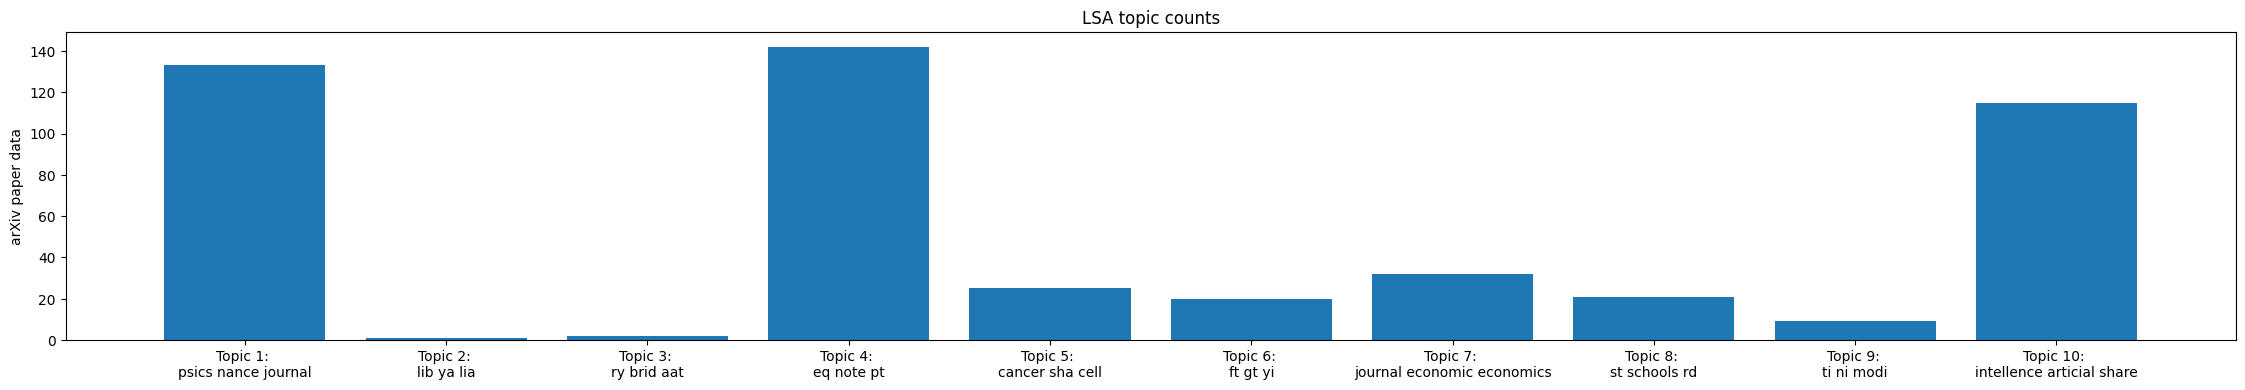

In [26]:
import matplotlib.pyplot as plt

top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i+1) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(28,4))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('arXiv paper data');
ax.set_title('LSA topic counts');
plt.show()


In [ ]:
import warnings
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the data from CSV
dfx = pd.read_csv('cleaned_qf.csv')
dfx['pdata_clean'] = dfx['pdata_clean'].astype(str)

# Drop unnecessary columns
dfx1 = dfx.drop(["page_data","summary","page_number","file_name","title"], axis=1)
#dfx1 = dfx1.dropna()

# Convert DataFrame to list of strings
docs = dfx1['pdata_clean'].values.tolist()

dfx1["length"] = dfx1["pdata_clean"].apply(lambda x : len(x.split()))

model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7)
topics, _ = model.fit_transform(dfx1.pdata_clean)


c:\ProgramData\Anaconda3\envs\test_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-02 15:41:52,870 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 36/36 [00:05<00:00,  6.73it/s]
2024-04-02 15:42:00,538 - BERTopic - Embedding - Completed ✓
2024-04-02 15:42:00,538 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-02 15:42:09,029 - BERTopic - Dimensionality - Completed ✓
2024-04-02 15:42:09,029 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-02 15:42:09,087 - BERTopic - Cluster - Completed ✓
2024-04-02 15:42:09,094 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-02 15:42:09,207 - BERTopic - Representation - Completed ✓


In [ ]:
#top 10 topics
model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,353,-1_as_it_pt_for,"[as, it, pt, for, lib, intellence, to, articia...",[multiplayer horvath jac er turf us analytic h...
1,0,55,0_ty_trend_resistance_term,"[ty, trend, resistance, term, for, tre, as, it...",[eenvalue adapted halo ux ty ty ga furtr ty an...
2,1,43,1_journal_nance_nancial_psics,"[journal, nance, nancial, psics, economics, ch...",[onel taxonomy master lsinki technology s nla...
3,2,38,2_usteri_tables_subse_mtns,"[usteri, tables, subse, mtns, hts, uster, subs...","[mtns hts uster usteri subse tables, mtns ht..."
4,3,37,3_racer_ya_ep_learni,"[racer, ya, ep, learni, us, lli, reinforcement...",[conference july washitoze chu li ya jia hao...
5,4,34,4_st_et_vt_gt,"[st, et, vt, gt, dt, suppose, vc, vp, mult, note]",[st st auxiary st as st stand stand t v...
6,5,33,5_intellence_nature_articial_li,"[intellence, nature, articial, li, gut, wa, mc...",[steihas sur bull acad posci sugar jamndi ajou...
7,6,32,6_subse_mtns_tables_hts,"[subse, mtns, tables, hts, uster, usteri, tabl...","[mtns hts uster usteri subse tables, mtns ht..."
8,7,31,7_time_price_elori_assic,"[time, price, elori, assic, keltner, short, in...",[elori assic quantitative strategi results t k...
9,8,30,8_tg_researcr_an_for,"[tg, researcr, an, for, at, but, revier, day, ...",[day an t day an t t day an t t for t aware...


In [ ]:
model.visualize_barchart(top_n_topics=9)

In [ ]:
model.visualize_term_rank()

In [ ]:
model.visualize_term_rank(log_scale=True)

In [ ]:
model.visualize_topics(top_n_topics=50)

In [ ]:
model.visualize_hierarchy(top_n_topics=50, width=800)


In [ ]:
model.visualize_heatmap(n_clusters=20, top_n_topics=100)


In [ ]:
timestamps = dfx1['published'].values.tolist()
topics_over_time = model.topics_over_time(docs, timestamps)
model.visualize_topics_over_time(topics_over_time, topics=[1,2,3,4,5,6,7,8,9,10])

0it [00:00, ?it/s]

52it [00:00, 59.95it/s]


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

preprocess_docs = df['pdata_clean'].map(preprocess)


dictionary = gensim.corpora.Dictionary(preprocess_docs)

bow_corpus = [dictionary.doc2bow(doc) for doc in preprocess_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=10)

# Compute Perplexity
# measure of how good the model is. lower Perplexity the better.
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus)) 

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocess_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.80113043871591

Coherence Score:  0.4772554323521788


Setting Number of topics to: 4
Got coherence score of: 0.4052718316667508
Setting Number of topics to: 10
Got coherence score of: 0.46031109910815077
Setting Number of topics to: 16
Got coherence score of: 0.49680214963696157
Setting Number of topics to: 22
Got coherence score of: 0.5559839685281859
Setting Number of topics to: 28
Got coherence score of: 0.5671103611438802
Setting Number of topics to: 34
Got coherence score of: 0.5519301945092209


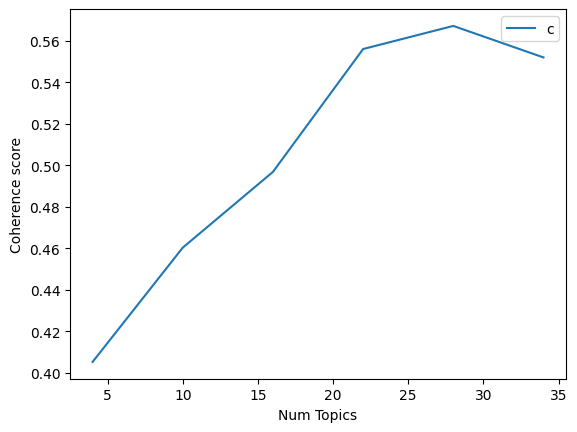

In [ ]:
# Compute Coherence Score
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    
    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    num_topics_list = []  # To store the corresponding num_topics
    for num_topics in range(start, limit, step):
        print('Setting Number of topics to:', num_topics)
        model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=10)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherencemodel.get_coherence()
        coherence_values.append(coherence_score)
        num_topics_list.append(num_topics)  # Store the num_topics value
        print('Got coherence score of:', coherence_score)

    return num_topics_list, coherence_values  # Return both num_topics and coherence values

# Compute coherence values
result = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=preprocess_docs, start=4, limit=40, step=6)

# Unpack result tuple
num_topics_list, coherence_values = result

# Plot coherence values
plt.plot(num_topics_list, coherence_values)  # Use num_topics_list as x-axis
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()